# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


# Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.4**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

## 1.1

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './data/'
upworthy_packages= pd.read_csv(data_folder+'upworthy.csv.gz')
upworthy_packages.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


In [61]:
print(f'number of packages: {len(upworthy_packages)}')

number of packages: 20603


## 1.2

In [62]:
experiments= upworthy_packages.groupby('clickability_test_id')[['created_at']].count()
experiments.columns =['number_of_tests']
print(f'number of experiments: {len(experiments.index)}')

number of experiments: 4822


In [63]:
experiments.head()

,number_of_tests
clickability_test_id,
51436061220cb800020001e7,4
51436069220cb800020005ae,5
51436069220cb800020005bd,2
5143606a220cb800020005c6,4
5143606b220cb800020005d7,5


In [64]:
avg_nbr_packages= experiments.number_of_tests.mean()
print(f'average number of packages considered: {avg_nbr_packages}')

average number of packages considered: 4.2727084197428455


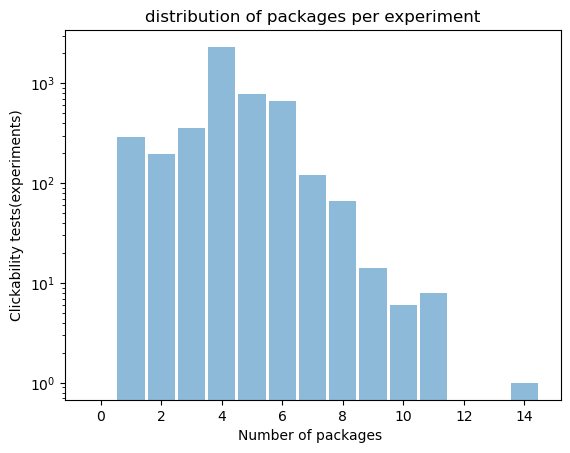

In [65]:
plt.hist(experiments['number_of_tests'], range=[0,15], bins = 15, alpha=0.5, log=True, rwidth=0.9, align='left')
plt.ylabel('Clickability tests(experiments)')
plt.xlabel('Number of packages ')
plt.title('distribution of packages per experiment');

## 1.3

In [66]:
upworthy_packages_ctr=upworthy_packages.copy()
upworthy_packages_ctr['ctr']=upworthy_packages_ctr.clicks/upworthy_packages_ctr.impressions
upworthy_packages_ctr.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446,0.049148
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645


## 1.4

In [67]:
mult_headlines_df=upworthy_packages.groupby('clickability_test_id').filter(lambda x: 
                                        len(x['headline'].unique())> 1)
mult_headlines_df.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
10,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,20.7,False,False,NaN,NaN,201446
20,2014-11-20 14:54:18.78,2016-04-02 16:25:54.159,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,A Science Guy Helps 3 Dudes From America Under...,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,546c7f2dbadeb5788700000a,4571,58,57.6,False,False,NaN,NaN,201446
21,2014-11-20 15:04:49.517,2016-04-02 16:25:54.112,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,546c7f2dbadeb5788700000a,4601,27,0.0,False,False,NaN,NaN,201446
22,2014-11-20 15:13:36.266,2016-04-02 16:31:47.52,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"The 3 Of Them Needed To See It In Person, And ...",<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,546c7f2dbadeb5788700000a,4567,63,100.0,True,False,NaN,NaN,201446
23,2014-11-20 15:15:25.697,2016-04-02 16:25:54.117,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,546c7f2dbadeb5788700000a,4524,44,4.5,False,False,NaN,NaN,201446


In [68]:
print(f'length of filtered dataframe with unique headline: {len(mult_headlines_df.index)}')

length of filtered dataframe with unique headline: 11600


In [69]:
nb_discarded_exps=len(experiments.index)-len(mult_headlines_df.clickability_test_id.unique())
nb_discarded_exps
print(f'number of discarded experiments after filter with unique headline: {nb_discarded_exps}')

number of discarded experiments after filter with unique headline: 2236


## 1.5

In [70]:
mult_image_df=upworthy_packages.groupby('clickability_test_id').filter(lambda x: 
                                        len(x['eyecatcher_id'].unique())> 1)
mult_image_df.head(3)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


In [71]:
print(f'length of filtered dataframe with unique eyecatcher_id: {len(mult_image_df.index)}')

length of filtered dataframe with unique eyecatcher_id: 7930


In [72]:
nb_discarded_exps=len(experiments.index)-len(mult_image_df.clickability_test_id.unique())
nb_discarded_exps
print(f'number of discarded experiments after filter with unique eyecatcher_id: {nb_discarded_exps}')

number of discarded experiments after filter with unique eyecatcher_id: 3108


## 1.6

When analyzing the effect of the headline and eyecatcher variables, we notice that the number of the tests that has been discarded due to varying the eyecatchers (3108) is higher than those discarded due to varying the headline (2236). This leads us to think that during the experiments, the different versions tested by Upworthy had more varied headlines than eyecatchers. This could be because it is harder to come up with new images than new headlines.

## 1.7

In [73]:
df_catsompare_headline_1= mult_headlines_df 
df_catsompare_headline_2= df_catsompare_headline_1.copy()
df_catsompare_headline= df_catsompare_headline_2.merge(df_catsompare_headline_1, 
                                                 on=['excerpt','lede','eyecatcher_id','clickability_test_id'])
df_catsompare_headline= df_catsompare_headline[df_catsompare_headline.headline_x != df_catsompare_headline.headline_y]
df_catsompare_headline.head(2)

,created_at_x,updated_at_x,clickability_test_id,excerpt,headline_x,lede,slug_x,eyecatcher_id,impressions_x,clicks_x,...,headline_y,slug_y,impressions_y,clicks_y,significance_y,first_place_y,winner_y,share_text_y,square_y,test_week_y
1,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,A Science Guy Helps 3 Dudes From America Under...,a-science-guy-helps-3-dudes-from-america-under...,4571,58,57.6,False,False,NaN,NaN,201446
2,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,He Sat Them Down And Told Them About An Immine...,he-sat-them-down-and-told-them-about-an-immine...,4601,27,0.0,False,False,NaN,NaN,201446


In [74]:
df_catsompare_headline['ctr_x']=['{:.4}'.format(x) for x in
                     df_catsompare_headline.clicks_x/df_catsompare_headline.impressions_x]
df_catsompare_headline['ctr_y']=['{:.4}'.format(x) for x in
                     df_catsompare_headline.clicks_y/df_catsompare_headline.impressions_y]
df_catsompare_headline.head(2)


,created_at_x,updated_at_x,clickability_test_id,excerpt,headline_x,lede,slug_x,eyecatcher_id,impressions_x,clicks_x,...,impressions_y,clicks_y,significance_y,first_place_y,winner_y,share_text_y,square_y,test_week_y,ctr_x,ctr_y
1,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,4571,58,57.6,False,False,NaN,NaN,201446,0.0111,0.01269
2,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,4601,27,0.0,False,False,NaN,NaN,201446,0.0111,0.005868


In [75]:
df_catsompare_headline['ctr1']= df_catsompare_headline.apply(lambda x: 
                                                           max(x.ctr_x,x.ctr_y), axis=1).astype(float)
df_catsompare_headline['ctr2']= df_catsompare_headline.apply(lambda x: 
                                                           min(x.ctr_x,x.ctr_y), axis=1).astype(float)
df_catsompare_headline['headline1']= df_catsompare_headline.apply(lambda x:
                                                            x.headline_x if x.ctr_x>x.ctr_y else x.headline_y, axis=1)
df_catsompare_headline['headline2']= df_catsompare_headline.apply(lambda x:
                                                            x.headline_x if x.ctr_x<x.ctr_y else x.headline_y, axis=1)

df_catsompare_headline.head(2)

,created_at_x,updated_at_x,clickability_test_id,excerpt,headline_x,lede,slug_x,eyecatcher_id,impressions_x,clicks_x,...,winner_y,share_text_y,square_y,test_week_y,ctr_x,ctr_y,ctr1,ctr2,headline1,headline2
1,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,False,NaN,NaN,201446,0.0111,0.01269,0.01269,0.011100,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...
2,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,...,False,NaN,NaN,201446,0.0111,0.005868,0.01110,0.005868,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...


In [76]:
df_catsompare_headline= df_catsompare_headline[df_catsompare_headline.ctr_x > df_catsompare_headline.ctr_y]
len(df_catsompare_headline)
print(f'length of new dataframe with distinct headlines: {len(df_catsompare_headline)}')

length of new dataframe with distinct headlines: 17721


In [77]:
df_catsompare_headline['date_created']= df_catsompare_headline.apply(lambda x:
                                                            x.created_at_x if x.ctr_x>x.ctr_y else x.created_at_y, axis=1)
df_final_headline= df_catsompare_headline[['clickability_test_id','excerpt','lede','eyecatcher_id',
                                         'headline1','headline2','ctr1','ctr2','date_created']]
df_final_headline.head(3)

,clickability_test_id,excerpt,lede,eyecatcher_id,headline1,headline2,ctr1,ctr2,date_created
2,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.01110,0.005868,2014-11-20 14:57:52.478
4,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.01110,0.009726,2014-11-20 14:57:52.478
6,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.01269,0.011100,2014-11-20 14:54:18.78


## 1.8

In [78]:
avg_diff_ctr= df_final_headline.apply(lambda x:
                                        x.ctr1-x.ctr2, axis=1).mean()
print(f'average difference per pair between ctr1 and ctr2: {avg_diff_ctr}')

average difference per pair between ctr1 and ctr2: 0.004117822984030236


In [79]:
avg_ctr2= df_final_headline.ctr2.mean()
print(f'average clickthrough rate for the least clicked through headline: {avg_ctr2}')


average clickthrough rate for the least clicked through headline: 0.010690873923593552


## 1.9
 When varying the headlines, we can see a significant relative effect on the clickthrough rates of the pair of packages. Since the average difference is 0.0041, modifying the headline will increase/decrease the chances of choosing a specific package by 0.411 % in average, which does not seem as much. But considering that the average loser clickthrough rate is of 1.069 %, changing the headline to the winner headline increases the average clickthrough rate almost by 40 %.

# Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

## 2.1

In [80]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))

How many words are here? 5


In [81]:
df_with_count= df_final_headline.copy()
df_with_count['numwords1']= df_with_count.apply(lambda x: count_words_simple(x.headline1), axis=1)
df_with_count['numwords2']= df_with_count.apply(lambda x: count_words_simple(x.headline2), axis=1)
df_with_count.head(3)

,clickability_test_id,excerpt,lede,eyecatcher_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,numwords2
2,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.01110,0.005868,2014-11-20 14:57:52.478,15,19
4,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.01110,0.009726,2014-11-20 14:57:52.478,15,16
6,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.01269,0.011100,2014-11-20 14:54:18.78,14,15


## 2.2

In [82]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [83]:
def fn_indicator(x,value):
    check =  any(item in value for item in x.lower().split(" "))
    return int(check)

In [84]:
for key,value in feature_wordsets.items():
    column_name_1= key+'1'
    column_name_2= key+'2'
    df_with_count[column_name_1]= df_with_count.apply(lambda x: 
                                                      fn_indicator(x.headline1,value), axis=1 )
    df_with_count[column_name_2]= df_with_count.apply(lambda x: 
                                                      fn_indicator(x.headline2,value), axis=1 )

In [85]:
df_with_count.head(3)

,clickability_test_id,excerpt,lede,eyecatcher_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,...,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
2,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.01110,0.005868,2014-11-20 14:57:52.478,15,...,0,0,0,0,0,0,0,1,1,1
4,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.01110,0.009726,2014-11-20 14:57:52.478,15,...,0,0,0,0,0,0,0,0,1,1
6,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.01269,0.011100,2014-11-20 14:54:18.78,14,...,0,0,0,0,0,0,0,0,0,1


## 2.3

In [86]:
with open(data_folder+'positive-words.txt', encoding = "ISO-8859-1")as file:
    file_contents = file.read()
    positive_content = file_contents.splitlines()

with open(data_folder+'negative-words.txt', encoding = "ISO-8859-1") as file:
    file_contents = file.read()
    negative_content = file_contents.splitlines()
print(f'original text file with semicolon separators: \n')    
negative_content[:40]

original text file with semicolon separators: 



[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite the following paper:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ',
 ';       mean that the sentence expresses a positive or negative opinion. ',
 ';       See the paper below:',
 ';',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ',
 ';          Handbook of Nat

In [87]:
positive_content = [line for line in positive_content if line and not line.startswith(';')]
negative_content = [line for line in negative_content if line and not line.startswith(';')]

In [88]:
print(f'positive content words: \n ')
positive_content[:10]

positive content words: 
 


['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [89]:
print(f'negative content words: \n ')
negative_content[:10]

negative content words: 
 


['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [90]:
df_with_count['positive1']= df_with_count.apply(lambda x: 
                                                fn_indicator(x.headline1,positive_content), axis=1 )
df_with_count['positive2']= df_with_count.apply(lambda x: 
                                                fn_indicator(x.headline2,positive_content), axis=1 )
df_with_count['negative1']= df_with_count.apply(lambda x: 
                                                fn_indicator(x.headline1,negative_content), axis=1 )
df_with_count['negative2']= df_with_count.apply(lambda x: 
                                                fn_indicator(x.headline2,negative_content), axis=1 )

In [91]:
df_with_count.head(3)

,clickability_test_id,excerpt,lede,eyecatcher_id,headline1,headline2,ctr1,ctr2,date_created,numwords1,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
2,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.01110,0.005868,2014-11-20 14:57:52.478,15,...,0,0,0,1,1,1,0,0,0,1
4,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.01110,0.009726,2014-11-20 14:57:52.478,15,...,0,0,0,0,1,1,0,1,0,0
6,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,546c7f2dbadeb5788700000a,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.01269,0.011100,2014-11-20 14:54:18.78,14,...,0,0,0,0,0,1,0,0,0,0


# Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

## 3.1

In [92]:
h1_words_count_mean = df_with_count['numwords1'].mean()
h2_words_count_mean = df_with_count['numwords2'].mean()
print(f'Headline 1 mean word count: {h1_words_count_mean}')
print(f'Headline 2 mean word count: {h2_words_count_mean}')
print(f'The difference between Headline 1 and Headline 2 mean word count: {h1_words_count_mean-h2_words_count_mean}')

Headline 1 mean word count: 15.0929405789741
Headline 2 mean word count: 14.815473167428475
The difference between Headline 1 and Headline 2 mean word count: 0.27746741154562393


In [93]:
# Dependent (paired) t-test
from scipy.stats import ttest_rel
# Test 1
ttest_rel(df_with_count['numwords1'], df_with_count['numwords2'])

Ttest_relResult(statistic=10.19936144630902, pvalue=2.330401293050431e-24)

In [94]:
# Test 2
ttest_rel(df_with_count['numwords1'], df_with_count['numwords2'], alternative="greater")

Ttest_relResult(statistic=10.19936144630902, pvalue=1.1652006465252156e-24)

In [95]:
# Independent (unpaired) t-test 
from scipy.stats import ttest_ind
# Test 1
ttest_ind(df_with_count['numwords1'], df_with_count['numwords2'], equal_var=True)

Ttest_indResult(statistic=8.466751018939988, pvalue=2.6189771671052275e-17)

Very small p-value (2.618...e-17) tells us, that we should reject null hypothesis. The samples are not drawn from the same distributions.

In [96]:
# Test 2
ttest_ind(df_with_count['numwords1'], df_with_count['numwords2'], equal_var=True, alternative='greater')

Ttest_indResult(statistic=8.466751018939988, pvalue=1.3094885835526138e-17)

From Unpaired Test 2 we can infere that the mean for first sample is greater than for the second. It means that headlines which were the winners have greater mean than losers. 

## 3.2

Even though the mean difference between winner and loser number of words is not even one whole word, we can infere from the tests that longer headlines are generally more successful.

## 3.3

In [97]:
def sample_xyzk(n=30, seed=12345):
    #np.random.seed(seed)
    X = np.random.uniform(size=n)
    Y = np.random.uniform(size=n)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    return X, Y, Z, K
X, Y, Z, K = sample_xyzk()

## 3.4

For uniform distribution, from definition, we compute the expected value resulting in
$ E[X] = E[Y] = 0.5, E[Z] = E[K] = 0.6 $ and variance yielding $V[X] = V[Y] = V[K] = \frac{1}{12}, V[Z] = \frac{1}{24}.$ <br>
Below are the estimates from samples of given sample size.

In [98]:
EX = X.mean()
EY = Y.mean()
EZ = Z.mean()
EK = K.mean()
VX = X.var()
VY = Y.var()
VZ = Z.var()
VK = K.var()
print(f"Expected value estimate is: {EX}; Variance estimate is: {VX}")
print(f"Expected value estimate of Y is: {EY}; Variance estimate is: {VY}")
print(f"Expected value estimate of Z is: {EZ}; Variance estimate is: {VZ}")
print(f"Expected value estimate of K is: {EK}; Variance estimate is: {VK}")

Expected value estimate is: 0.4887022627669266; Variance estimate is: 0.095672121717272
Expected value estimate of Y is: 0.4918051000459888; Variance estimate is: 0.08383175776646329
Expected value estimate of Z is: 0.5902536814064578; Variance estimate is: 0.04885711125214454
Expected value estimate of K is: 0.591805100045989; Variance estimate is: 0.08383175776646329


## 3.5

In [99]:
N = 10000 # Number of experiments/samples
p_vals_up_xz = []
p_vals_up_xk = []
p_vals_p_xz = []
p_vals_p_xk = []
for i in range(N):
    X, Y, Z, K = sample_xyzk(seed=i)
    _, p_up_xz = ttest_ind(X, Z, equal_var=False)
    _, p_up_xk = ttest_ind(X, K, equal_var=False)
    p_vals_up_xz.append(p_up_xz)
    p_vals_up_xk.append(p_up_xk)
    _, p_p_xz = ttest_rel(X, Z)
    _, p_p_xk = ttest_rel(X, K)
    p_vals_p_xz.append(p_p_xz)
    p_vals_p_xk.append(p_p_xk)

## 3.6

In [100]:
print(f"Statistical power of unpaired test comparing X and Z:\
{sum(i < 0.05 for i in p_vals_up_xz)/N}")
print(f"Statistical power of unpaired test comparing X and K:\
{sum(i < 0.05 for i in p_vals_up_xk)/N}")
print(f"Statistical power of paired test comparing X and Z:\
{sum(i < 0.05 for i in p_vals_p_xz)/N}")
print(f"Statistical power of paired test comparing X and K:\
{sum(i < 0.05 for i in p_vals_p_xk)/N}")

Statistical power of unpaired test comparing X and Z:0.219
Statistical power of unpaired test comparing X and K:0.2556
Statistical power of paired test comparing X and Z:0.7355
Statistical power of paired test comparing X and K:0.2503


## 3.7
Paired t-tests are helpful when dealing with realted samples and when we are not assuming equal variances.

When it comes to results, we can say that they are aligned with the expectation - we can see that X with respect to K is just shifted, that is why the percentage of rejections is low. Whereas for X with respect to Z there is mean shift, different variance and another distribution included, which results in higher rejection rate. We can observe much higher rate for paired test, which assumes that samples are related, which is not the case. That is why it is over 70 %.

## 3.8

In [101]:
def bootstrap(samples, seed):
    np.random.seed(seed)
    return np.random.choice(samples, size=len(samples), replace=True)


def calculate_avg_diff_and_conf_interval_means(series, n_samples=10000, confidence=0.95):
    means = np.zeros(n_samples)
    for i in range(n_samples):
        sample = bootstrap(series, seed=i)
        means[i] = (sample.mean())

    mean_means = means.mean() 

    conf_interval = np.nanpercentile(means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
    return mean_means, conf_interval


# The mean ratio between the number of words in the winner headline and the loser headline 
# (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
df_with_count["words_ratio"] = df_with_count["numwords1"]/df_with_count["numwords2"]
words_ratio = calculate_avg_diff_and_conf_interval_means(df_with_count["words_ratio"])
print(f"Mean ratio between the number of words in the winner headline and the loser headline: average difference: {words_ratio[0]}, confidence intervals: {words_ratio[1]}")


# The difference in usage of positive words between winner and loser headlines.
positive_words = calculate_avg_diff_and_conf_interval_means(df_with_count["positive1"] - df_with_count["positive2"])
print(f"The difference in usage of positive words between winner and loser headlines: average difference: {positive_words[0]}, confidence intervals: {positive_words[1]}")

# The difference in usage of negative words between winner and loser headlines.
negative_words = calculate_avg_diff_and_conf_interval_means(df_with_count["negative1"] - df_with_count["negative2"])
print(f"The difference in usage of negative words between winner and loser headlines: average difference: {negative_words[0]}, confidence intervals: {negative_words[1]}")

# The difference in usage of each type of pronoun between winner and loser headlines.
for pronoun in list(feature_wordsets.keys()):
    pronoun_result = calculate_avg_diff_and_conf_interval_means(df_with_count[pronoun+"1"] - df_with_count[pronoun+"2"])
    print(f"The difference in usage of {pronoun} pronoun between winner and loser headlines: average difference: {pronoun_result[0]}, confidence intervals: {pronoun_result[1]}")

Mean ratio between the number of words in the winner headline and the loser headline: average difference: 1.0620588155252706, confidence intervals: [1.05737264 1.06675641]
The difference in usage of positive words between winner and loser headlines: average difference: -0.007352079453755431, confidence intervals: [-0.01653406  0.00174934]
The difference in usage of negative words between winner and loser headlines: average difference: 0.01632256644658879, confidence intervals: [0.00795666 0.02477287]
The difference in usage of first_person_singular pronoun between winner and loser headlines: average difference: 0.015181970543423058, confidence intervals: [0.00942385 0.02093561]
The difference in usage of first_person_plural pronoun between winner and loser headlines: average difference: -0.011185209638282264, confidence intervals: [-0.01687264 -0.00564302]
The difference in usage of second_person pronoun between winner and loser headlines: average difference: 0.004488482591275887, conf

## 3.9
We can say that usually the winner headline is longer. However, we did not find any significance in the fact whether winner headlines are more positive or not, as the values are very small and confidence interval includes negative and positive values. On the other hand in the case of negative sentiment, value is positive as well as both 95 % confidence bounds. That leads to a conclusion that winner headlines are averagely more negative.
Similarly, we could say that preferably people read headlines containing first person singular and third_person_singular and avoid reading first_person_plural.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


## 4.1

In [102]:
def bootstrap_CI(data, n_samples=1000, confidence=0.95):
    means = np.zeros(n_samples)
    data = np.array(data)
    for i in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = sample.mean()
    
    conf_interval = np.nanpercentile(means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
    return conf_interval

In [103]:
df_with_months = df_with_count.copy() # df created for additional month  and year column
df_with_months["date_created"] = pd.to_datetime(df_with_months["date_created"])

df_with_months["month"] = df_with_months["date_created"].dt.month
df_with_months["year"] = df_with_months["date_created"].dt.year

# create df grouped by months containing mean numbers of words (nw) and CIs
df_nw = df_with_months.query('year>2013 or (year==2013 and month > 3)').groupby(["year","month"]).apply(lambda x: pd.Series({ 
        'numwords1_vals': x['numwords1'].values,
        'numwords1_bounds': bootstrap_CI(x['numwords1'].values),
        'numwords2_vals': x['numwords2'].values,
        'numwords2_bounds':bootstrap_CI(x['numwords2'].values),
        
    }))

df_nw.reset_index(inplace=True)
df_nw.index = df_nw.apply(lambda x: f'{x.month}/{x.year}',axis=1) # sed unique selfexplanatory index for the plotting
df_nw.head()

,year,month,numwords1_vals,numwords1_bounds,numwords2_vals,numwords2_bounds
4/2013,2013,4,"[4, 4, 7, 14, 14, 9, 11, 11, 8, 18, 12, 15, 15...","[13.13407960199005, 14.03495024875622]","[7, 12, 12, 9, 12, 12, 13, 8, 13, 7, 14, 13, 9...","[12.621517412935324, 13.517537313432836]"
5/2013,2013,5,"[12, 14, 14, 9, 13, 14, 14, 14, 14, 14, 10, 9,...","[13.339181286549708, 14.526461988304094]","[11, 12, 11, 17, 13, 13, 13, 13, 14, 13, 15, 1...","[13.760087719298246, 14.83640350877193]"
6/2013,2013,6,"[10, 10, 11, 10, 10, 10, 11, 14, 14, 10, 10, 1...","[14.127600472813238, 14.633628841607566]","[11, 15, 15, 11, 14, 10, 10, 11, 10, 13, 11, 1...","[13.763593380614656, 14.279078014184398]"
7/2013,2013,7,"[12, 12, 15, 15, 15, 17, 4, 4, 15, 15, 15, 12,...","[14.899742930591259, 15.521915167095116]","[10, 17, 12, 10, 17, 10, 12, 14, 4, 12, 14, 14...","[14.619537275064268, 15.249421593830334]"
8/2013,2013,8,"[9, 9, 15, 10, 13, 7, 8, 8, 8, 14, 14, 15, 15,...","[13.786054913294798, 14.390245664739885]","[13, 15, 13, 12, 9, 9, 7, 14, 9, 7, 9, 15, 16,...","[13.144508670520231, 13.832514450867052]"


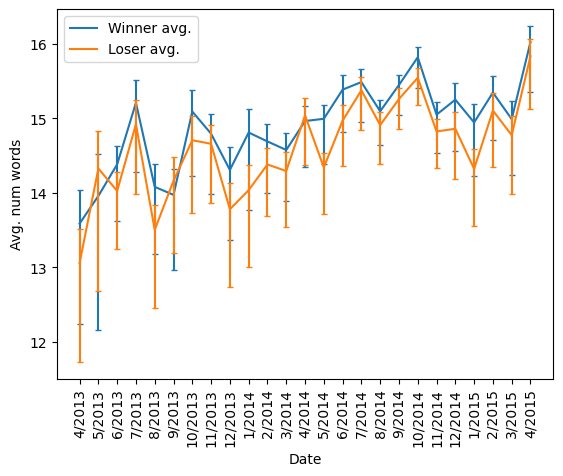

In [104]:

#plot errorbars from previously obtained filtered df
p = plt.plot(df_nw.index, df_nw['numwords1_vals'].apply(np.mean), label='Winner avg.')
plt.errorbar(df_nw.index, df_nw['numwords1_bounds'].apply(lambda x: x[0]), yerr=df_nw['numwords1_bounds'].apply(lambda x: x[1]-x[0]), fmt="none", ecolor=p[0].get_color(), capsize=2)
p = plt.plot(df_nw.index, df_nw['numwords2_vals'].apply(np.mean), label='Loser avg.')
plt.errorbar(df_nw.index, df_nw['numwords2_bounds'].apply(lambda x: x[0]), yerr=df_nw['numwords2_bounds'].apply(lambda x: x[1]-x[0]), fmt="none", ecolor=p[0].get_color() ,capsize=2)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Avg. num words')
plt.show()

## 4.2

In [105]:
# create df contanining the means and CIs for all categories (cats) 
df_cats = df_with_months.query('year>2013 or (year==2013 and month > 3)').groupby(["year","month"]).apply(lambda x: pd.Series({
        'positive_vals': (x['positive1'].values + x['positive2'].values)/2,
        'positive_bounds': bootstrap_CI((x['positive1'].values + x['positive2'].values)/2),
        'negative_vals': (x['negative1'].values + x['negative2'].values)/2,
        'negative_bounds':bootstrap_CI((x['negative1'].values + x['negative2'].values)/2),
        'first_person_singular_vals': (x['first_person_singular1'].values + x['first_person_singular2'].values)/2,
        'first_person_singular_bounds': bootstrap_CI((x['first_person_singular1'].values + x['first_person_singular2'].values)/2),
        'first_person_plural_vals': (x['first_person_plural1'].values + x['first_person_plural2'].values)/2,
        'first_person_plural_bounds': bootstrap_CI((x['first_person_plural1'].values + x['first_person_plural2'].values)/2),
        'third_person_singular_vals': (x['third_person_singular1'].values + x['third_person_singular2'].values)/2,
        'third_person_singular_bounds': bootstrap_CI((x['third_person_singular1'].values + x['third_person_singular2'].values)/2),
        'third_person_plural_vals': (x['third_person_plural1'].values + x['third_person_plural2'].values)/2,
        'third_person_plural_bounds': bootstrap_CI((x['third_person_plural1'].values + x['third_person_plural2'].values)/2),
        'second_person_vals': (x['second_person1'].values + x['second_person2'].values)/2,
        'second_person_bounds': bootstrap_CI((x['second_person1'].values + x['second_person2'].values)/2),
    }))


df_cats.reset_index(inplace=True)
df_cats.index = df_cats.apply(lambda x: f'{x.month}/{x.year}',axis=1)
df_cats.head()

,year,month,positive_vals,positive_bounds,negative_vals,negative_bounds,first_person_singular_vals,first_person_singular_bounds,first_person_plural_vals,first_person_plural_bounds,third_person_singular_vals,third_person_singular_bounds,third_person_plural_vals,third_person_plural_bounds,second_person_vals,second_person_bounds
4/2013,2013,4,"[0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 1.0, 0.5, 0.5, ...","[0.3656716417910448, 0.4626865671641791]","[0.0, 0.0, 0.0, 0.5, 1.0, 0.5, 0.0, 0.5, 0.5, ...","[0.25870646766169153, 0.35572139303482586]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.08208955223880597, 0.16666666666666666]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.024875621890547265, 0.06716417910447761]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.18407960199004975, 0.26616915422885573]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06965174129353234, 0.12686567164179105]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23880597014925373, 0.3358208955223881]"
5/2013,2013,5,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.5, 0.5, ...","[0.3391812865497076, 0.45614035087719296]","[0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2543859649122807, 0.3654970760233918]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07017543859649122, 0.13157894736842105]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.023318713450292464, 0.07317251461988297]","[0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.5, 1.0, 1.0, ...","[0.2222222222222222, 0.3362573099415205]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07602339181286549, 0.1433479532163742]","[0.5, 0.5, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15497076023391812, 0.25146198830409355]"
6/2013,2013,6,"[0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, ...","[0.4101654846335697, 0.4858156028368794]","[1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.0, ...","[0.3888888888888889, 0.4657210401891253]","[0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.12647754137115838, 0.18439716312056736]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.08156028368794327, 0.12887115839243496]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.18085106382978725, 0.24113475177304963]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10635342789598111, 0.15602836879432624]","[0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17375886524822695, 0.23167848699763594]"
7/2013,2013,7,"[0.5, 0.5, 0.0, 0.5, 0.5, 1.0, 0.0, 0.5, 0.5, ...","[0.2866323907455013, 0.3560411311053985]","[0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.0, 0.0, ...","[0.29048843187660667, 0.36503856041131105]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14781491002570693, 0.2095437017994858]","[0.5, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, ...","[0.14906812339331624, 0.2120822622107969]","[0.5, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, ...","[0.2442159383033419, 0.3149100257069409]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09640102827763496, 0.15038560411311053]","[0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, ...","[0.14652956298200515, 0.2043701799485861]"
8/2013,2013,8,"[0.5, 0.0, 0.5, 0.0, 0.5, 0.0, 0.5, 1.0, 0.5, ...","[0.33959537572254334, 0.4190751445086705]","[0.5, 0.5, 0.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, ...","[0.29335260115606937, 0.37427745664739887]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13583815028901733, 0.203757225433526]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07947976878612717, 0.1329479768786127]","[0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1893063583815029, 0.25722543352601157]","[0.5, 0.5, 1.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, ...","[0.11849710982658959, 0.18067196531791904]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, ...","[0.19797687861271676, 0.2658959537572254]"


Text(0, 0.3, 'Avg. number of occurences per A/B test')

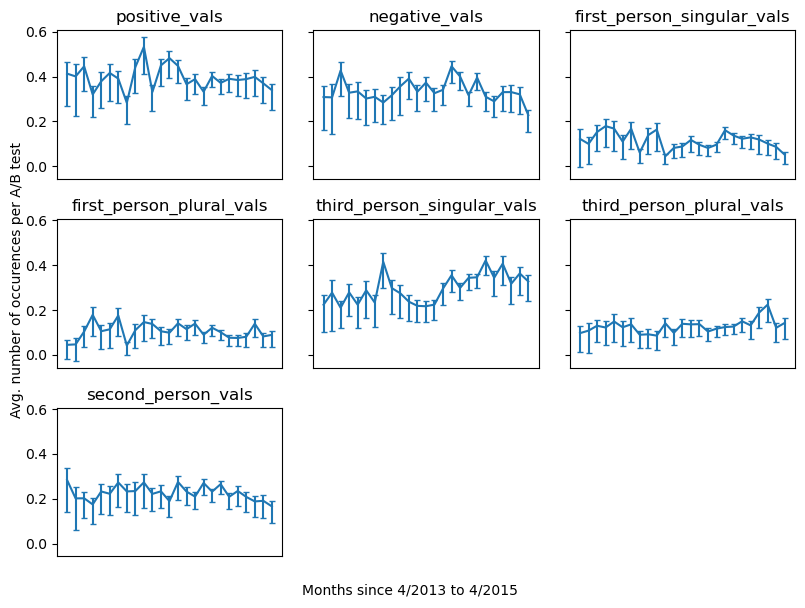

In [106]:
fig, ax = plt.subplots(3,3,figsize= (8,6), sharey = True, sharex = True)
fig.delaxes(ax[2,2])
fig.delaxes(ax[2,1])
axs = fig.get_axes() # axes flat list

i = 0
for i in range(len(axs)): # plot corresponding errorbarplot for each axes = category
    axs[i].plot(df_cats.index, df_cats[df_cats.columns[i*2+2]].apply(np.mean))
    axs[i].errorbar(df_cats.index, df_cats[df_cats.columns[i*2+3]].apply(lambda x: x[0]), yerr=df_cats[df_cats.columns[i*2+3]].apply(lambda x: x[1]-x[0]), fmt='none', capsize=2)
    axs[i].set_title(df_cats.columns[i*2+2])
    i+=1

fig.tight_layout()
fig.axes[6].get_xaxis().set_ticks([])
fig.text(0.5,0, "Months since 4/2013 to 4/2015", ha='center')
fig.text(0,0.3, "Avg. number of occurences per A/B test", rotation = 90)

## 4.3

We can see a clear ascending trend in the headline length in both losers and winners of A/B tests throughout the time. However, avg. number of positive and negative words remains more or less the same, as well as most of the pronouns besides third person singular pronouns, where there can be seen a slight trend upwards, too.

## 4.4

In [107]:
# split the dataframe as specified
df_t1 = df_with_months.query('year<2014 or (year==2014 and month < 4)')
df_t2 = df_with_months.query('year>2014 or (year==2014 and month > 3)')

## 4.5

In [108]:
print("Lets start with mean values of differences for the two time periods")

c_pos_t1, c_pos_t2 = (df_t1["positive1"]-df_t1["positive2"]).mean(), (df_t2["positive1"]-df_t2["positive2"]).mean()
print(f"Mean of difference of counts of positive words amng winners and losers is for t1 {c_pos_t1:.4f} and for t2 is {c_pos_t2:.4f}, difference: {c_pos_t1-c_pos_t2:.4f}.")
c_neg_t1, c_neg_t2 = (df_t1["negative1"]-df_t1["negative2"]).mean(), (df_t2["negative1"]-df_t2["negative2"]).mean()
print(f"Mean of difference of counts of neagtive words amng winners and losers is for t1 {c_neg_t1:.4f} and for t2 is {c_neg_t2:.4f}, difference: {c_neg_t1-c_neg_t2:.4f}.")


for pronoun in list(feature_wordsets.keys()):   
    c_pro_t1, c_pro_t2 = (df_t1[pronoun+"1"]-df_t1[pronoun+"2"]).mean(), (df_t2[pronoun+"1"]-df_t2[pronoun+"2"]).mean()
    print(f"Mean of difference of counts of {pronoun} words amng winners and losers is for t1 {c_pro_t1:.4f} and for t2 is {c_pro_t2:.4f}, difference: {c_pro_t1-c_pro_t2:.4f}.")


Lets start with mean values of differences for the two time periods
Mean of difference of counts of positive words amng winners and losers is for t1 -0.0028 and for t2 is -0.0090, difference: 0.0061.
Mean of difference of counts of neagtive words amng winners and losers is for t1 0.0404 and for t2 is 0.0072, difference: 0.0332.
Mean of difference of counts of first_person_singular words amng winners and losers is for t1 0.0126 and for t2 is 0.0161, difference: -0.0035.
Mean of difference of counts of first_person_plural words amng winners and losers is for t1 -0.0142 and for t2 is -0.0099, difference: -0.0043.
Mean of difference of counts of second_person words amng winners and losers is for t1 0.0191 and for t2 is -0.0013, difference: 0.0203.
Mean of difference of counts of third_person_singular words amng winners and losers is for t1 0.0309 and for t2 is 0.0405, difference: -0.0096.
Mean of difference of counts of third_person_plural words amng winners and losers is for t1 0.0104 and

Here we can see the greatest change in the cases of negative words (0.0332) and second_person words (0.0203) – in both cases in the decreasing direction.

Let's support previous observation with further testing.

In [109]:
_, p_pos = ttest_ind(df_t1["positive1"]-df_t1["positive2"], df_t2["positive1"]-df_t2["positive2"])
print(f"For diference of positive words count means from periods t1 and t2 is the p-value is {p_pos:.4f}")
_, p_neg = ttest_ind(df_t1["negative1"]-df_t1["negative2"], df_t2["negative1"]-df_t2["negative2"])
print(f"For diference of negative words count means from periods t1 and t2 is the p-value is {p_neg:.4f}")

for pronoun in list(feature_wordsets.keys()):   
    _, p_pro = ttest_ind(df_t1[pronoun+"1"]-df_t1[pronoun+"2"], df_t2[pronoun+"1"]-df_t2[pronoun+"2"])
    print(f"For diference of {pronoun} words count means from periods t1 and t2 is the p-value is {p_pro:.4f}")

For diference of positive words count means from periods t1 and t2 is the p-value is 0.5554
For diference of negative words count means from periods t1 and t2 is the p-value is 0.0006
For diference of first_person_singular words count means from periods t1 and t2 is the p-value is 0.5960
For diference of first_person_plural words count means from periods t1 and t2 is the p-value is 0.5010
For diference of second_person words count means from periods t1 and t2 is the p-value is 0.0195
For diference of third_person_singular words count means from periods t1 and t2 is the p-value is 0.2825
For diference of third_person_plural words count means from periods t1 and t2 is the p-value is 0.1399


Here we can see similar results as in previous part – p-value is smaller than 0.05 only for negative words and second person pronouns. Let's confirm the observation with the 'greater' alternative hypothesis.

In [110]:
_, p_neg = ttest_ind(df_t1["negative1"]-df_t1["negative2"], df_t2["negative1"]-df_t2["negative2"],  alternative="greater")
print(f"For diference of negative words count means from periods t1 and t2 and the 'greater' alternative hyp. is the p-value is {p_neg:.4f}")

_, p_pro = ttest_ind(df_t1["second_person1"]-df_t1["second_person2"], df_t2["second_person1"]-df_t2["second_person2"], alternative="greater")
print(f"For diference of second_person words count means from periods t1 and t2 and the 'greater' alternative hyp. is the p-value is {p_pro:.4f}")

For diference of negative words count means from periods t1 and t2 and the 'greater' alternative hyp. is the p-value is 0.0003
For diference of second_person words count means from periods t1 and t2 and the 'greater' alternative hyp. is the p-value is 0.0098


## 4.6
We can clearly see that the only case where p-value is below significance level $\alpha = 0.05$ is for negative_words and second_person pronouns, which means, that the value of mean of differences in usage have demonstrably changed. We have further shown that it has decreased – the null hypothesis with 'greater' alternative hypothesis was rejected in both cases (i.e., means were greater in first period).

## 4.7

In [111]:
# create nuew dfs for positive and negative words
df_positive = df_with_count.copy().query('positive1>0 and positive2>0')
df_negative = df_with_count.copy().query('negative1>0 and negative2>0')
df_both = df_with_count.copy().query('negative1>0 and negative2>0 and positive1>0 and positive2>0') # just for better view of the data


## 4.8


In [112]:
print(f"Positive sentiment samples {df_positive.shape[0]}, negative sentiment samples {df_negative.shape[0]}, samples with both sentiments {df_both.shape[0]}")

# positive sentiment dfs
df_positive_wwp = df_positive.query('first_person_singular1 > 0 and first_person_singular2 == 0') # only winner contains the pronoun 
df_positive_lwp = df_positive.query('first_person_singular1 == 0 and first_person_singular2 > 0') # only loser contains the pronoun
print(f"Number of positive sentiment A/B tests with winners containing first_person singular (and loser not) {df_positive_wwp.shape[0]}, and the other way round {df_positive_lwp.shape[0]}")
# negative sentiment dfs
df_negative_wwp = df_negative.query('first_person_singular1 > 0 and first_person_singular2 == 0') # only winner contains the pronoun 
df_negative_lwp = df_negative.query('first_person_singular1 == 0 and first_person_singular2 > 0') # only loser contains the pronoun
print(f"Number of negative sentiment A/B tests with winners containing first_person singular (and loser not) {df_negative_wwp.shape[0]}, and the other way round {df_negative_lwp.shape[0]}")

Positive sentiment samples 3460, negative sentiment samples 3192, samples with both sentiments 564
Number of positive sentiment A/B tests with winners containing first_person singular (and loser not) 287, and the other way round 233
Number of negative sentiment A/B tests with winners containing first_person singular (and loser not) 212, and the other way round 198


We have filtered only the options, where only one of the headlines uses the examined effector: first_person_singular. We can now see for both sentiments, that the first_person_singular usage was more prevalent for winner headlines.

In [113]:
def bootstrap_means(data, n_samples=1000):
    data = np.array(data)
    means = np.zeros(n_samples)
    for i in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = (sample.mean())
    return means

Let's start with an exploration for positive sentiment.

In [114]:
# as it is not exactly specified, what is the effect lets assume that the measured effect are ctrs
pos_wwp_difs = df_positive_wwp['ctr1'] - df_positive_wwp['ctr2'] # difference of clickthroughs between winner and loser headline
pos_lwp_difs = df_positive_lwp['ctr1'] - df_positive_lwp['ctr2']

print(f"Difference of means of differences of clickthroughs {pos_wwp_difs.mean() - pos_lwp_difs.mean()}")

_, p_val = ttest_ind(pos_wwp_difs, pos_lwp_difs)
print(f"P-value {p_val} for statistical independence test of two arrays of ctr differences.")
print(f"But this is only one value, lets bootstrap.")

wwp_bst_means = bootstrap_means(pos_wwp_difs.values) # bootstrap differences and compute means for each sample
lwp_bst_means = bootstrap_means(pos_lwp_difs.values)

confidence = 0.95
ci = np.nanpercentile(wwp_bst_means-lwp_bst_means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
print(f"Mean of differences of bootstrapped means {(wwp_bst_means - lwp_bst_means).mean()}, with CI {ci}")


Difference of means of differences of clickthroughs -5.047894004875332e-05
P-value 0.8856380861303706 for statistical independence test of two arrays of ctr differences.
But this is only one value, lets bootstrap.
Mean of differences of bootstrapped means -5.462010416922143e-05, with CI [-0.00073116  0.00064095]


In [115]:
# as it is not exactly specified, what is the effect lets assume that the measured effect are ctrs
neg_wwp_difs = df_negative_wwp['ctr1'] - df_negative_wwp['ctr2'] #difference of clickthroughs between winner and loser headline
neg_lwp_difs = df_negative_lwp['ctr1'] - df_negative_lwp['ctr2']

print(f"Difference of means of differences of clickthroughs {neg_wwp_difs.mean() - neg_lwp_difs.mean()}")

_, p_val = ttest_ind(neg_wwp_difs, neg_lwp_difs) 
print(f"P-value {p_val} for statistical independence test of two arrays of ctr differences.")
print(f"But this is only one value, lets bootstrap.")

wwp_bst_means = bootstrap_means(neg_wwp_difs.values) # bootstrap differences and compute means for each sample
lwp_bst_means = bootstrap_means(neg_lwp_difs.values)

confidence = 0.95
ci = np.nanpercentile(wwp_bst_means-lwp_bst_means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
print(f"Mean of differences of bootstrapped means {(wwp_bst_means - lwp_bst_means).mean()}, with CI {ci}")

print(f"As the difference is positive with positive CI bounds, lets run also statistical independent test with 'greater' alternative hypothese.")
_, p_val = ttest_ind(neg_wwp_difs, neg_lwp_difs, alternative='greater') # run test on bootstrapped means
print(f"P-value {p_val} for statistical independence test of two arrays of ctr differences.")

Difference of means of differences of clickthroughs 0.0009355464789403438
P-value 0.013750150534791611 for statistical independence test of two arrays of ctr differences.
But this is only one value, lets bootstrap.
Mean of differences of bootstrapped means 0.0009319007141700018, with CI [0.00023185 0.0016481 ]
As the difference is positive with positive CI bounds, lets run also statistical independent test with 'greater' alternative hypothese.
P-value 0.006875075267395806 for statistical independence test of two arrays of ctr differences.


Here we can conclude that use of the first_person_singular pronouns does not make any significant change in headlines with positive sentiment, as the difference of ctr winner-loser differences is very small and the confidence bounds are positive and negative, which conclusion is supported also by statistical test.

On the other hand, in the case of negative sentiment the usage of first_person_singular does make a significant difference. The means and the confidence bounds speak in the favor of using these pronouns in combination with the negative sentiment of headline (in terms of clickthrough rate).

## 4.9

Significant trends we found during the analysis of Upworthy packages are outlined below. The first trend was found in headline length - longer headlines generally achieve higher click-through rates (ctr) [3.1]. Another important observation is that negative-sentiment words lead to higher ctrs as well [3.8], and when combined with first-person pronouns, negative words yield even more significant results [4.8]. However, in the case of positive words, we did not find any considerable preference either for positive sentiment alone [3.8] or in combination with first first-person pronouns [4.8].
On the other hand, in the case of other pronouns, we could infer from the bootstrapped confidence bounds and means that people preferably read headlines containing first-person singular and third_person_singular and avoid reading first_person_plural [3.8]. 